### 1. 여러개의 그래프

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- Figure 객체

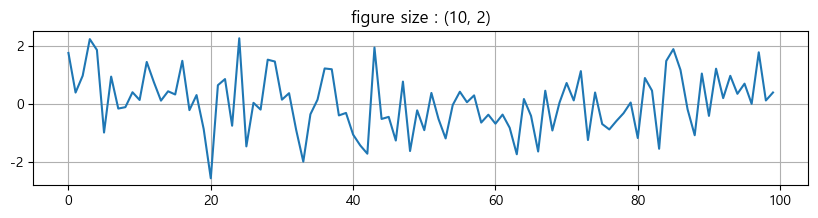

In [6]:
np.random.seed(0)
plt.figure(figsize=(10, 2))
plt.title("figure size : (10, 2)")
plt.plot(np.random.randn(100))
plt.grid()
plt.show()

- subplot

In [7]:
from PIL import Image
img1 = Image.open('data/output.png')
img2 = Image.open('data/삼각함수.png')

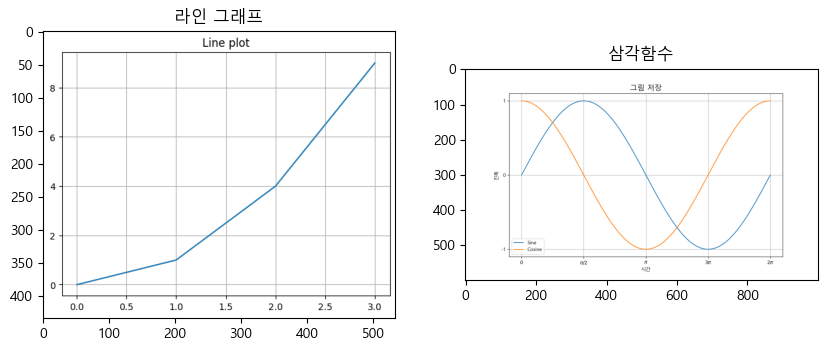

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)      # (행의갯수, 열의갯수, 순서)
plt.imshow(img1), plt.title('라인 그래프')
plt.subplot(122)        # 1행 2열 2번째
plt.imshow(img2), plt.title('삼각함수')
plt.show()

- Anscombe's Quartet

In [14]:
ans = sns.load_dataset('anscombe')

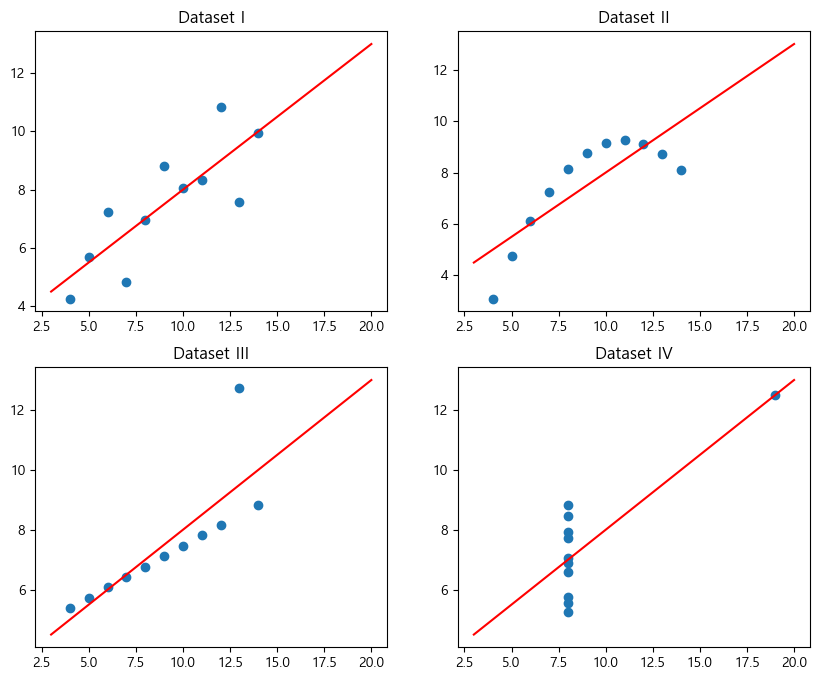

In [17]:
plt.figure(figsize=(10,8))
for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    plt.subplot(2,2,index+1)
    plt.scatter(ds.x,ds.y,marker='o')
    plt.plot([3,20],[4.5,13],'r-')
    plt.title(f'Dataset {roman}')
plt.show()

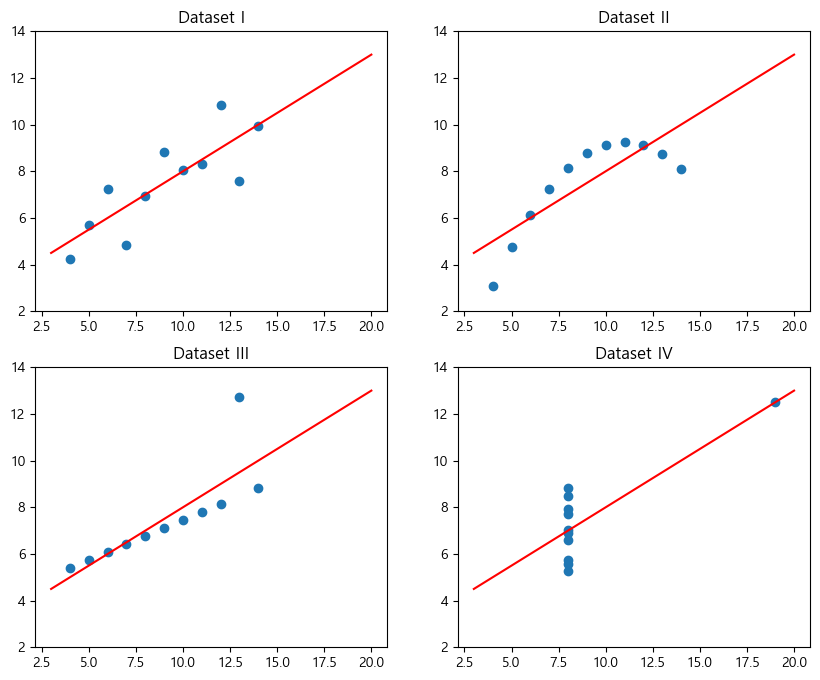

In [18]:
plt.figure(figsize=(10,8))
for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    plt.subplot(2,2,index+1)
    plt.ylim(2,14)
    plt.scatter(ds.x,ds.y,marker='o')
    plt.plot([3,20],[4.5,13],'r-')
    plt.title(f'Dataset {roman}')
plt.show()

- subplots()

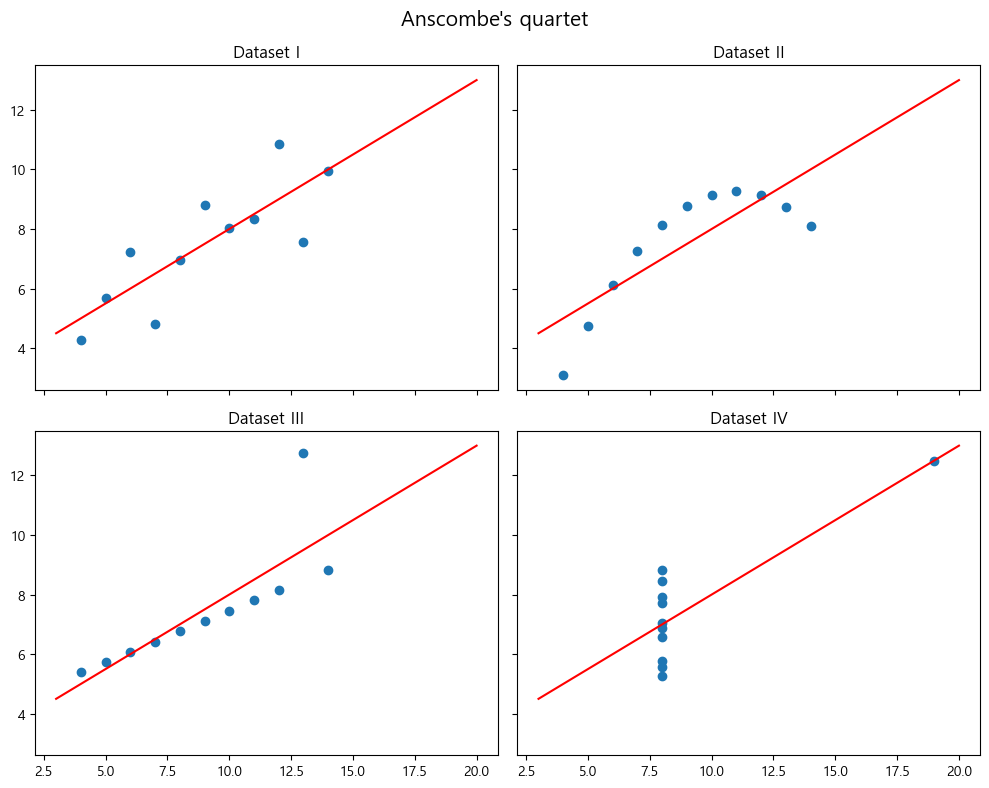

In [20]:
fig, axes = plt.subplots(2, 2, figsize= (10,8), sharex=True, sharey=True)
for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]    # row index, column index
    ax.scatter(ds.x,ds.y,marker='o')
    ax.plot([3,20],[4.5,13],'r-')
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's quartet", fontsize = 15)
plt.tight_layout()
plt.show()

- Axis 객체와 축

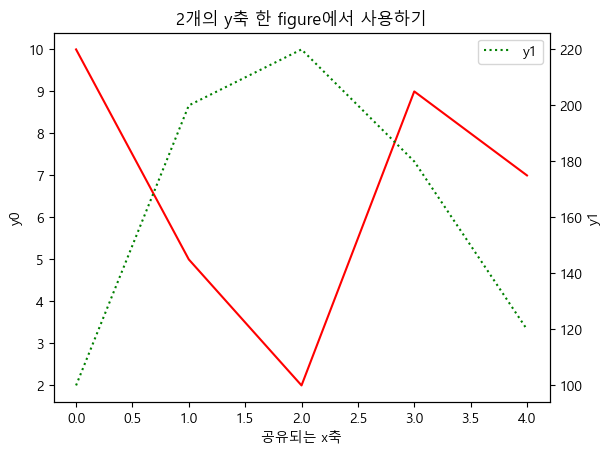

In [22]:
fig, ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10, 5, 2, 9, 7], 'r-', label="y0")
ax0.set_ylabel("y0")
ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label="y1")
ax1.set_ylabel("y1")
ax1.grid(False)
ax0.set_xlabel("공유되는 x축")
plt.legend()
plt.show()

- 갤러리에 있는 그래프를 그려 보기

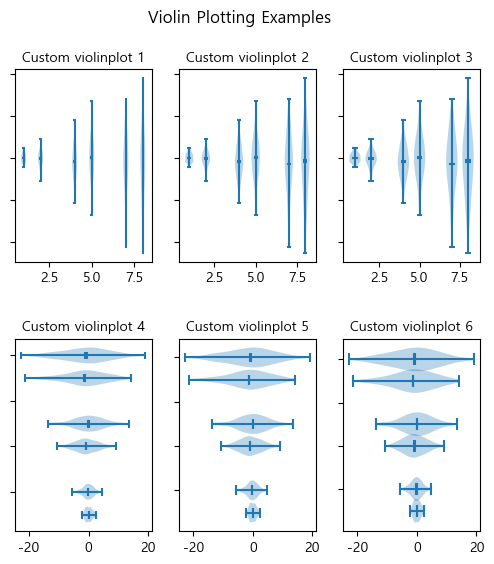

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt

# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axes[0, 1].violinplot(data, pos, points=40, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axes[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axes[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)
axes[1, 0].set_title('Custom violinplot 4', fontsize=fs)

axes[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[1, 1].set_title('Custom violinplot 5', fontsize=fs)

axes[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method=0.5)
axes[1, 2].set_title('Custom violinplot 6', fontsize=fs)

for ax in axes.flatten():
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

- Iris 모든 품종의 특성에 대한 boxplot을 하나의 그래프 안에 그리기

In [58]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


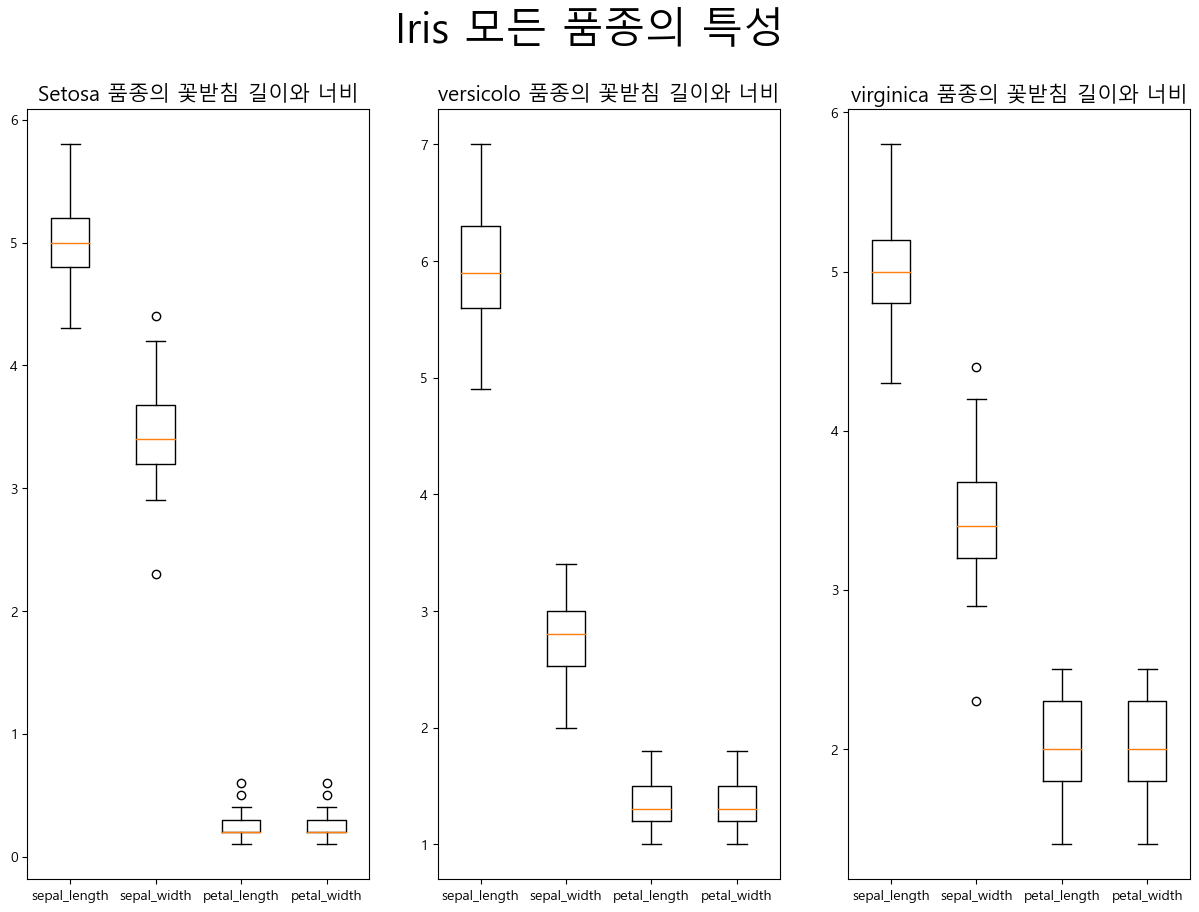

In [59]:
fig, axes = plt.subplots(1, 3, figsize= (15,10))
ssl = iris[iris.species == 'setosa'].sepal_length
ssw = iris[iris.species == 'setosa'].sepal_width
psl = iris[iris.species == 'setosa'].petal_width
psw = iris[iris.species == 'setosa'].petal_width
axes[0].boxplot((ssl,ssw,psl,psw), labels=['sepal_length','sepal_width','petal_length','petal_width'])
axes[0].set_title('Setosa 품종의 꽃받침 길이와 너비', fontsize =15)

svel = iris[iris.species == 'versicolor'].sepal_length
svew = iris[iris.species == 'versicolor'].sepal_width
pvel = iris[iris.species == 'versicolor'].petal_width
pvew = iris[iris.species == 'versicolor'].petal_width
axes[1].boxplot((svel,svew,pvel,pvew), labels=['sepal_length','sepal_width','petal_length','petal_width'])
axes[1].set_title('versicolo 품종의 꽃받침 길이와 너비', fontsize =15)

svil = iris[iris.species == 'virginica'].sepal_length
sviw = iris[iris.species == 'virginica'].sepal_width
pvil = iris[iris.species == 'virginica'].petal_width
pviw = iris[iris.species == 'virginica'].petal_width
axes[2].boxplot((ssl,ssw,pvil,pviw), labels=['sepal_length','sepal_width','petal_length','petal_width'])
axes[2].set_title('virginica 품종의 꽃받침 길이와 너비', fontsize =15)
fig.suptitle("Iris 모든 품종의 특성", fontsize = 30)
plt.show()

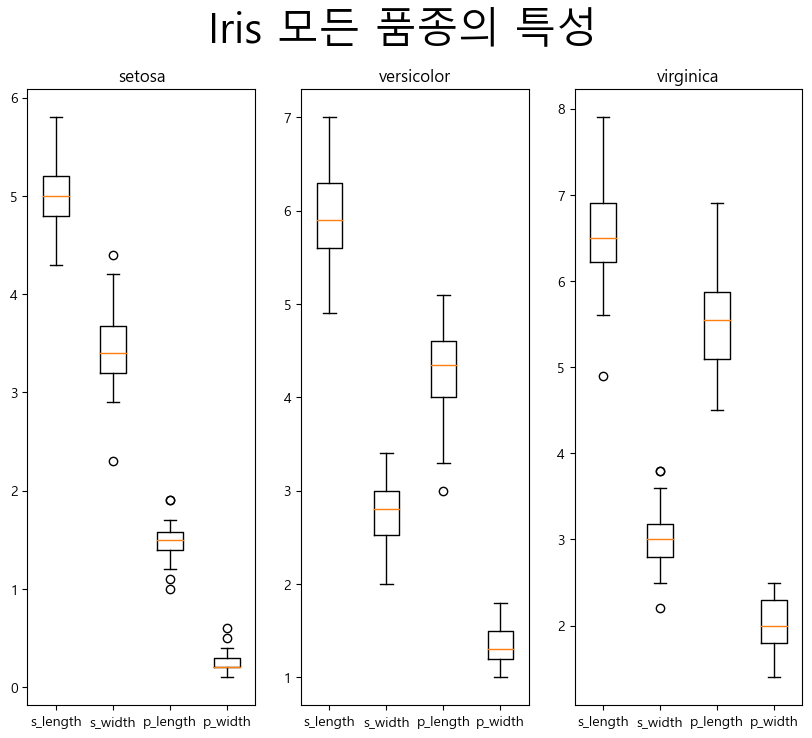

In [68]:
plt.figure(figsize=(10,8))
for index, species in enumerate(iris.species.unique()):
    sl = iris[iris.species == species].sepal_length
    sw = iris[iris.species == species].sepal_width
    pl = iris[iris.species == species].petal_length
    pw = iris[iris.species == species].petal_width
    plt.subplot(1,3,index+1)
    plt.boxplot((sl,sw,pl,pw), labels=['s_length','s_width','p_length','p_width'])
    plt.title(species)
plt.suptitle("Iris 모든 품종의 특성", fontsize = 30)
plt.show()

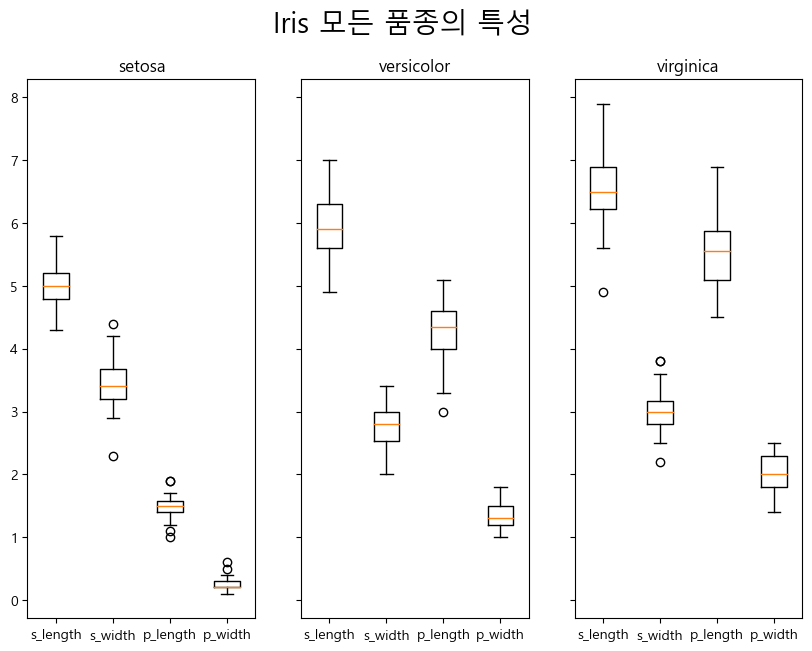

In [74]:
fig, axes = plt.subplots(1, 3, figsize= (10,7), sharey=True)
for index, species in enumerate(iris.species.unique()):
    sl = iris[iris.species == species].sepal_length
    sw = iris[iris.species == species].sepal_width
    pl = iris[iris.species == species].petal_length
    pw = iris[iris.species == species].petal_width
    ax = axes[index]
    ax.boxplot((sl,sw,pl,pw), labels=['s_length','s_width','p_length','p_width'])
    ax.set_title(species)
plt.suptitle("Iris 모든 품종의 특성", fontsize = 20)
plt.show()